# Lending Loan Risk Model
## Deskripsi Proyek 
Proyek ini bertujuan untuk membuat model analisis keuangan nasabah untuk mempertimbangkan kelayakan calon nasabah dalam peminjaman uang.
Diharapakan hasil pemodelan ini menjadi acuan regulasi dalam kelayakan calon nasabah agar mempermudah proses penilaian dan peninjauan.

## Alur Kerja
Dalam proyek ini, tim kami berfokus pada Data Integrity dan Business Logic melalui tahap berikut:
1. Cleaning & Feature Selection
2. Feature Engineering
3. Data Protection
4. Predictive Modeling

## Tim Proyek
* Ababil Khoerul Imam
* Ferliyana Ronnan
* Vierico Ventora
* Dosen Pembimbing: Ibnu Febry Kurniawan

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

## Data Loading dan Explorasi Awal

Pada tahap ini, dataset *Lending Club* dimuat ke dalam environment menggunakan fungsi read_csv() dari library pandas. Data kemudian disimpan dalam sebuah DataFrame bernama df untuk memudahkan proses analisis dan pemrosesan selanjutnya.

Langkah awal eksplorasi dilakukan dengan:
- Menampilkan *lima baris teratas* dari dataset menggunakan head() untuk memperoleh gambaran umum struktur dan isi data.
- Menampilkan *informasi dataset* menggunakan info() untuk mengetahui jumlah baris, jumlah kolom, tipe data setiap variabel, serta keberadaan nilai yang hilang (missing values).

Tahap ini bertujuan untuk memahami karakteristik awal data sebelum dilakukan proses pembersihan, seleksi fitur, dan pemodelan machine learning.

In [67]:
# data load
df = pd.read_csv('lending_club_data.csv')

print("Five upper row")
display(df.head()) 

print("\ndata info")
print(df.info())

Five upper row


,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"



data info
<class 'pandas.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  str    
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  str    
 5   sub_grade             396030 non-null  str    
 6   emp_title             373103 non-null  str    
 7   emp_length            377729 non-null  str    
 8   home_ownership        396030 non-null  str    
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  str    
 11  issue_d               396030 non-null  str    
 12  loan_status           396030 non-null  str    
 13  purpose               396030 non-null  str    
 14  title                 394274 non-null  str    
 15  

## Pengecekan Missing Value

Tahap ini bertujuan untuk **mengidentifikasi nilai yang hilang** (*missing values*) pada dataset. Missing value dapat memengaruhi kualitas model machine learning jika tidak ditangani dengan tepat.

Langkah-langkah yang dilakukan:

1. Menghitung jumlah missing value untuk setiap kolom menggunakan fungsi `isnull().sum()`.
2. Menampilkan hanya kolom yang memiliki missing value untuk memudahkan identifikasi.
3. Membuat **visualisasi heatmap** dengan Seaborn untuk mendapatkan gambaran distribusi missing value di seluruh dataset.  
   - Warna terang menandakan nilai yang hilang.
   - Heatmap membantu mendeteksi pola missing value, misalnya apakah terjadi secara acak atau berkumpul di beberapa kolom tertentu.

Informasi ini akan menjadi dasar dalam **strategi imputasi atau penghapusan kolom** pada tahap preprocessing selanjutnya.


Missing value
emp_title               22927
emp_length              18301
title                    1756
revol_util                276
mort_acc                37795
pub_rec_bankruptcies      535
dtype: int64


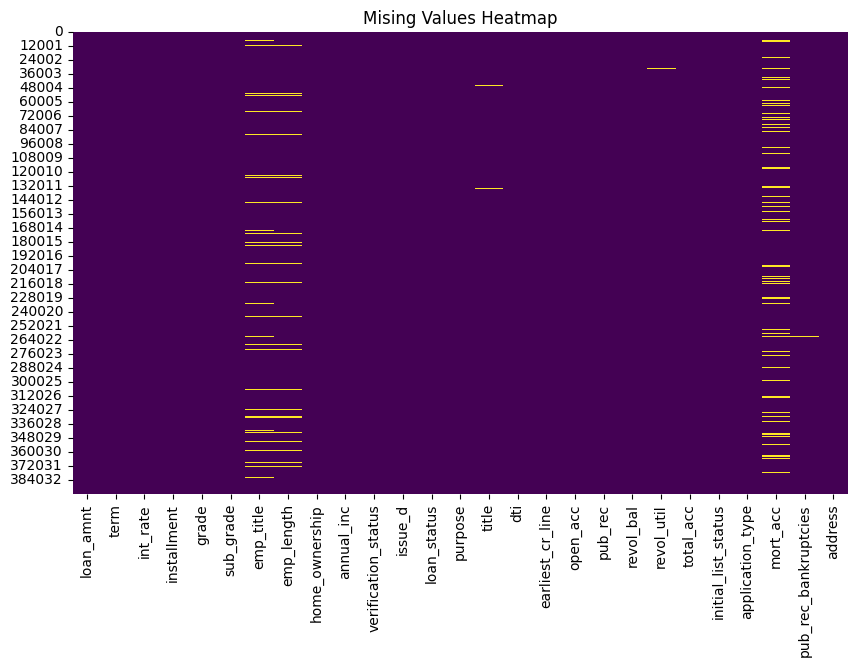

In [68]:
# missing value check
print("\nMissing value")
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0]) 

plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Mising Values Heatmap')
plt.show()

## Pengecekan Data Duplikat dan Ringkasan Statistik

Pada tahap ini, dilakukan **identifikasi baris duplikat** dalam dataset:

1. Fungsi `duplicated()` digunakan untuk menghitung jumlah baris yang identik secara keseluruhan.
2. Jika ditemukan duplikat, baris tersebut **dihapus** menggunakan `drop_duplicates(inplace=True)` agar dataset lebih bersih dan tidak menimbulkan bias saat pemodelan.

Setelah duplikat dibersihkan, dilakukan **ringkasan statistik** menggunakan `describe()`:

- Memberikan informasi dasar mengenai kolom numerik, seperti:
  - jumlah data (`count`)
  - nilai rata-rata (`mean`)
  - standar deviasi (`std`)
  - nilai minimum dan maksimum (`min`, `max`)
  - kuartil (`25%`, `50%`, `75%`)

Ringkasan ini membantu memahami **distribusi awal data**, mendeteksi **outlier**, dan menjadi dasar untuk tahap preprocessing berikutnya.

In [69]:
# duplicate check
print(f"\nSum of duplicate rows : {df.duplicated().sum()}")

df.drop_duplicates(inplace=True)

print("\nStatistical Summary")
display(df.describe())


Sum of duplicate rows : 0

Statistical Summary


,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
count,396030.000000,396030.000000,396030.000000,3.960300e+05,396030.000000,396030.000000,396030.000000,3.960300e+05,395754.000000,396030.000000,358235.000000,395495.000000
mean,14113.888089,13.639400,431.849698,7.420318e+04,17.379514,11.311153,0.178191,1.584454e+04,53.791749,25.414744,1.813991,0.121648
std,8357.441341,4.472157,250.727790,6.163762e+04,18.019092,5.137649,0.530671,2.059184e+04,24.452193,11.886991,2.147930,0.356174
min,500.000000,5.320000,16.080000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,2.000000,0.000000,0.000000
25%,8000.000000,10.490000,250.330000,4.500000e+04,11.280000,8.000000,0.000000,6.025000e+03,35.800000,17.000000,0.000000,0.000000
50%,12000.000000,13.330000,375.430000,6.400000e+04,16.910000,10.000000,0.000000,1.118100e+04,54.800000,24.000000,1.000000,0.000000
75%,20000.000000,16.490000,567.300000,9.000000e+04,22.980000,14.000000,0.000000,1.962000e+04,72.900000,32.000000,3.000000,0.000000
max,40000.000000,30.990000,1533.810000,8.706582e+06,9999.000000,90.000000,86.000000,1.743266e+06,892.300000,151.000000,34.000000,8.000000


## Analisis Korelasi Antar Fitur Numerik

Pada tahap ini, dilakukan **analisis korelasi** untuk mengevaluasi hubungan linear antar fitur numerik dalam dataset:

1. Fungsi `select_dtypes(include=['number', 'float'])` digunakan untuk memilih semua kolom numerik.
2. Fungsi `corr()` menghitung **koefisien korelasi Pearson** antar setiap pasangan kolom numerik.
   - Nilai berkisar dari -1 hingga 1:
     - **1** → korelasi positif sempurna
     - **-1** → korelasi negatif sempurna
     - **0** → tidak ada korelasi linear
3. Heatmap dibuat menggunakan Seaborn (`sns.heatmap`) untuk **memvisualisasikan korelasi**:
   - Angka pada heatmap menunjukkan kekuatan hubungan linear antar fitur.
   - Warna panas (merah) menandakan korelasi positif tinggi, warna dingin (biru) menandakan korelasi negatif tinggi.

Informasi ini membantu dalam:
- Mengidentifikasi **multikolinearitas** antar fitur.
- Menentukan kolom yang **bisa di-drop** atau **diubah** sebelum tahap modeling.

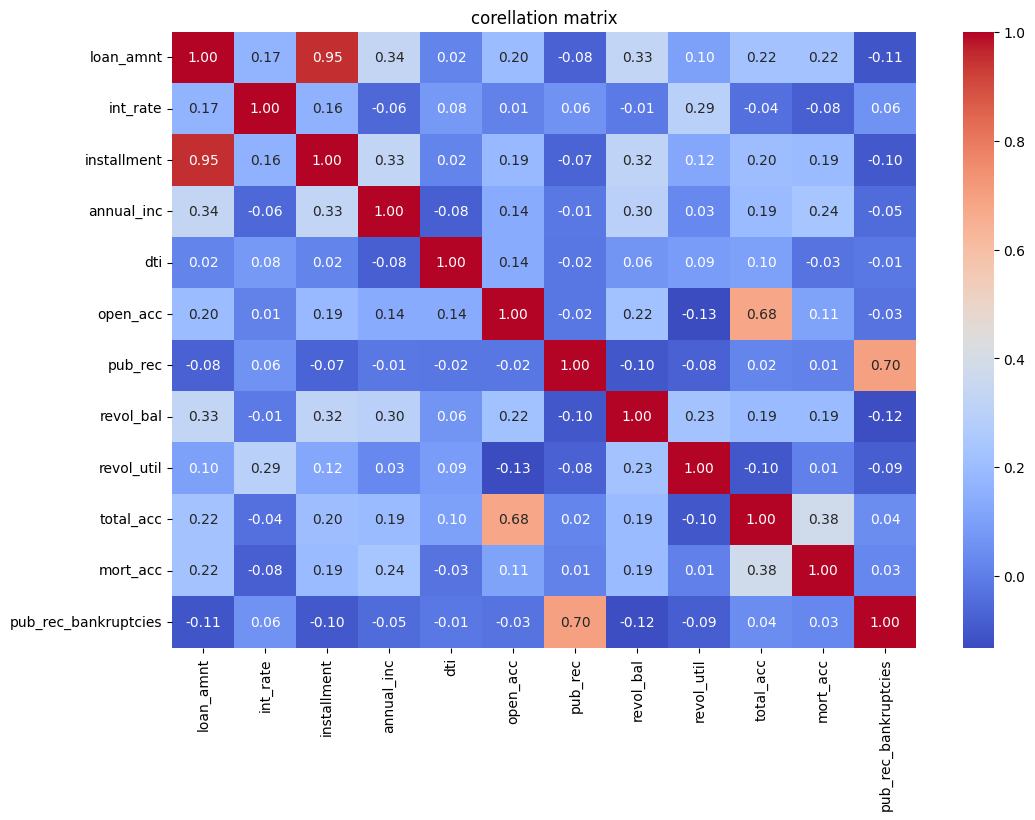

In [70]:
corr=df.select_dtypes(include= ['number', 'float']).corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('corellation matrix')
plt.show()

## Feature Selection dan Alasan Drop/Keep Kolom

Pada tahap ini, dilakukan **seleksi fitur** untuk menentukan kolom mana yang akan **dihapus (drop)**, **dipertahankan (keep)**, atau **diolah untuk feature engineering**. Tujuan utamanya adalah:

- Mengurangi **multikolinearitas**
- Menghapus **noise / data yang tidak kredibel**
- Memaksimalkan **informasi untuk prediksi risiko kredit**

### Kolom yang di-drop

- **pub_rec**  
  Kolom ini berkorelasi tinggi dengan `pub_rec_bankruptcies`. Dipilih untuk di-drop karena `pub_rec_bankruptcies` lebih spesifik dan ekstrem, sehingga lebih efektif sebagai indikator risiko gagal bayar.

- **installment**  
  Merupakan hasil perhitungan dari `loan_amnt` dan `int_rate`. Jika dimasukkan ke model, dapat menimbulkan **multikolinearitas**.

- **address**  
  Informasi alamat dianggap **tidak kredibel** untuk model dan rawan menimbulkan bias atau overfitting.

- **emp_title**  
  Merupakan **free text**, banyak typo, dan memiliki **high cardinality**, sehingga sulit diolah untuk model machine learning.

- **grade**  
  Lebih dipilih `sub_grade` yang lebih detail sehingga model dapat menangkap perbedaan risiko yang tipis.

- **title**  
  Tumpang tindih dengan `purpose`. Biasanya berupa teks bebas, sedangkan `purpose` sudah rapi dan terstruktur.

In [71]:
cols_to_drop = [
    'emp_title',
    'title',
    'installment',
    'address',
    'grade',
    'pub_rec'
]

df = df.drop(columns=cols_to_drop)

print(df.columns.tolist())


['loan_amnt', 'term', 'int_rate', 'sub_grade', 'emp_length', 'home_ownership', 'annual_inc', 'verification_status', 'issue_d', 'loan_status', 'purpose', 'dti', 'earliest_cr_line', 'open_acc', 'revol_bal', 'revol_util', 'total_acc', 'initial_list_status', 'application_type', 'mort_acc', 'pub_rec_bankruptcies']


## Encoding dan Analisis Distribusi Emp_length

Pada tahap ini, kolom **`emp_length`** dilakukan proses **encoding** ke dalam bentuk numerik agar distribusi datanya dapat dianalisis dengan lebih mudah.

Kolom `emp_length` awalnya berupa data kategorikal yang merepresentasikan lama bekerja peminjam. Oleh karena itu, setiap kategori dipetakan ke nilai numerik menggunakan *mapping* sebagai berikut:
- `< 1 year` → 0  
- `1–9 years` → 1 hingga 9  
- `10+ years` → 10  

Setelah proses encoding, dilakukan pengecekan distribusi data menggunakan `value_counts()` untuk:
- Melihat persebaran lama bekerja peminjam
- Mengidentifikasi proporsi nilai yang hilang (*missing values*)
- Menjadi dasar dalam menentukan **strategi imputasi** yang paling tepat pada tahap preprocessing selanjutnya

Langkah ini membantu memastikan bahwa penanganan missing value pada `emp_length` tidak dilakukan secara acak, tetapi berdasarkan karakteristik data yang ada.


In [72]:
# Melihat daftar kategori unik apa saja yang ada
print("Kategori unik di emp_length:")
print(df['emp_length'].unique())

# Melihat jumlah kemunculan tiap kategori (Lebih disarankan)
print("\nDistribusi tiap kategori:")
print(df['emp_length'].value_counts())

Kategori unik di emp_length:
<StringArray>
['10+ years',   '4 years',  '< 1 year',   '6 years',   '9 years',   '2 years',
   '3 years',   '8 years',   '7 years',   '5 years',    '1 year',         nan]
Length: 12, dtype: str

Distribusi tiap kategori:
emp_length
10+ years    126041
2 years       35827
< 1 year      31725
3 years       31665
5 years       26495
1 year        25882
4 years       23952
6 years       20841
7 years       20819
8 years       19168
9 years       15314
Name: count, dtype: int64


In [73]:
# Encoding 'emp_length' column menjadi float agar bia di cek persebaran datanya dan diputuskan untuk mengisinya pakai apa
emp_map = {
    '< 1 year': 0,
    '1 year': 1,
    '2 years': 2,
    '3 years': 3,
    '4 years': 4,
    '5 years': 5,
    '6 years': 6,
    '7 years': 7,
    '8 years': 8,
    '9 years': 9,
    '10+ years': 10
}

# Terapkan ke dataframe
df['emp_length'] = df['emp_length'].map(emp_map)


print(df['emp_length'].value_counts(dropna=False))

emp_length
10.0    126041
2.0      35827
0.0      31725
3.0      31665
5.0      26495
1.0      25882
4.0      23952
6.0      20841
7.0      20819
8.0      19168
NaN      18301
9.0      15314
Name: count, dtype: int64


## Distribusi Emp_length

Visualisasi ini menunjukkan **persebaran lama bekerja (`emp_length`)** setelah proses encoding. Grafik digunakan untuk melihat pola dominan pada data serta mengidentifikasi kategori dengan frekuensi tinggi maupun rendah, sehingga membantu dalam pengambilan keputusan terkait penanganan missing value dan pengelompokan kategori.


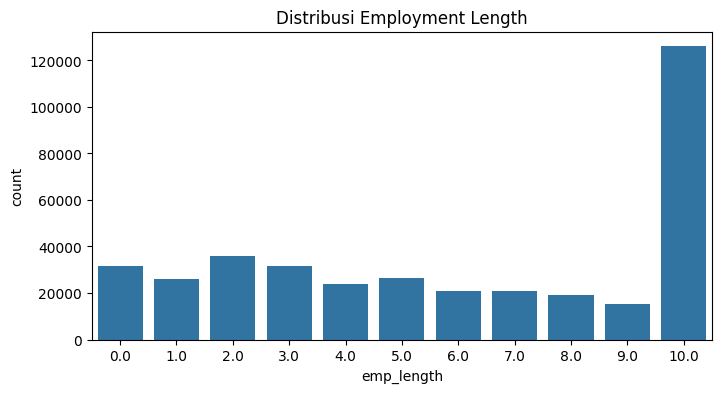

In [74]:
plt.figure(figsize=(8,4))
sns.countplot(x='emp_length', data=df)
plt.title('Distribusi Employment Length')
plt.show()

## Imputasi Missing Value pada Emp_length

Berdasarkan hasil visualisasi sebelumnya, distribusi `emp_length` cenderung **tidak simetris (skewed)**. Oleh karena itu, nilai yang hilang pada kolom ini diimputasi menggunakan **median**, karena lebih robust terhadap pengaruh nilai ekstrem dibandingkan rata-rata.

Setelah proses imputasi, dilakukan pengecekan ulang untuk memastikan bahwa **tidak ada lagi missing value** pada kolom `emp_length`.


In [75]:
emp_median = df['emp_length'].median()

df['emp_length'] = df['emp_length'].fillna(emp_median)

print(f"Nilai Median yang digunakan: {emp_median}")
print(f"Jumlah Missing Value sekarang: {df['emp_length'].isnull().sum()}")

Nilai Median yang digunakan: 6.0
Jumlah Missing Value sekarang: 0


## Distribusi Revol_util

Visualisasi histogram digunakan untuk melihat **distribusi nilai `revol_util`** serta tingkat kemiringan (*skewness*) data. Nilai skewness dihitung untuk mengetahui apakah distribusi data bersifat simetris atau tidak, sehingga dapat membantu dalam menentukan **metode imputasi** yang paling sesuai pada tahap preprocessing selanjutnya.


Nilai Skewness: -0.07177802032853096


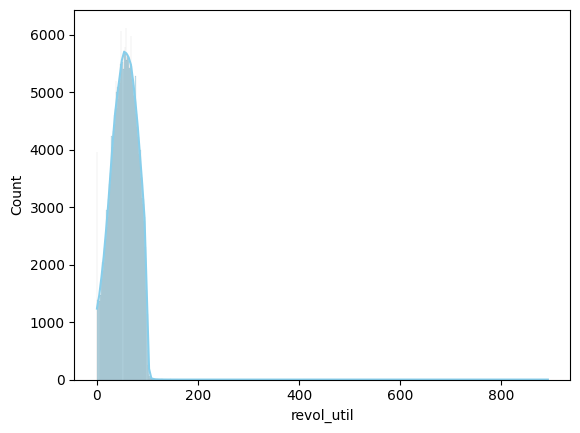

In [76]:
sns.histplot(df['revol_util'], kde=True, color='skyblue')

print(f"Nilai Skewness: {df['revol_util'].skew()}")

## Imputasi Missing Value pada Revol_util

Berdasarkan hasil analisis distribusi sebelumnya, kolom `revol_util` memiliki nilai **skewness sebesar -0.07**, yang menunjukkan bahwa distribusi data relatif **simetris** dan tidak memiliki kemiringan yang signifikan.

Oleh karena itu, missing value pada kolom ini diimputasi menggunakan **mean**, karena pada distribusi yang mendekati simetris, nilai rata-rata dapat merepresentasikan data dengan baik tanpa terpengaruh secara signifikan oleh nilai ekstrem.

In [77]:
revol_util = df['revol_util'].isnull().sum()
print(f"Missing value pada revol_util: {revol_util.sum()}")

if revol_util > 0:
    df ['revol_util'] = df ['revol_util'].fillna(df['revol_util'].mean())
    print ("Missing value pada revol_util telah diisi dengan mean.")

Missing value pada revol_util: 276
Missing value pada revol_util telah diisi dengan mean.


## Distribusi Pub_rec_bankruptcies

Visualisasi histogram digunakan untuk melihat **distribusi nilai `pub_rec_bankruptcies`** serta tingkat kemiringan (*skewness*) datanya. Analisis ini bertujuan untuk memahami karakteristik distribusi dan menentukan **strategi imputasi** yang paling sesuai pada tahap preprocessing selanjutnya.

Nilai Skewness: 3.4234403681961574


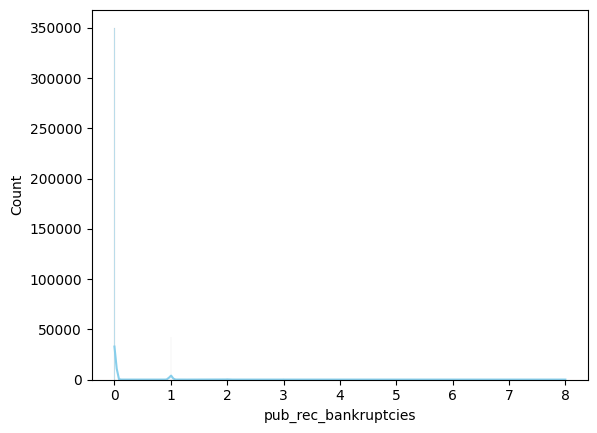

In [78]:
sns.histplot(df['pub_rec_bankruptcies'], kde=True, color='skyblue')

print(f"Nilai Skewness: {df['pub_rec_bankruptcies'].skew()}")

## Imputasi Missing Value pada Pub_rec_bankruptcies

Berdasarkan hasil analisis distribusi sebelumnya, kolom `pub_rec_bankruptcies` memiliki nilai **skewness yang tinggi (≈ 3.4)**, yang menunjukkan distribusi sangat condong ke kanan (*right-skewed*).

Oleh karena itu, missing value pada kolom ini diimputasi menggunakan **modus**, karena mayoritas nilai berada pada angka yang paling sering muncul. Penggunaan modus lebih representatif dibandingkan mean atau median pada distribusi yang sangat skewed dan didominasi oleh nilai nol.

In [79]:
# Mencari nilai yang paling sering muncul (Modus)
pub_rec_mode = df['pub_rec_bankruptcies'].mode()[0]

# Isi data kosong dengan Modus
df['pub_rec_bankruptcies'] = df['pub_rec_bankruptcies'].fillna(pub_rec_mode)

print(f"Nilai Modus yang digunakan: {pub_rec_mode}")
print(f"Sisa missing values: {df['pub_rec_bankruptcies'].isnull().sum()}")

Nilai Modus yang digunakan: 0.0
Sisa missing values: 0


### Justifikasi Statistik Imputasi `mort_acc` Menggunakan `total_acc`

Meskipun nilai korelasi antara **`total_acc`** dan **`mort_acc`** berada pada tingkat **sedang (0.38)**, fitur `total_acc` tetap dipilih sebagai dasar imputasi dengan pertimbangan berikut:

1. **Prediktor Paling Relevan**  
   Dibandingkan fitur numerik lainnya, `total_acc` menunjukkan hubungan yang paling masuk akal dan relatif signifikan terhadap jumlah akun hipotek (`mort_acc`), baik secara statistik maupun konseptual.

2. **Preservasi Distribusi Data**  
   Imputasi berbasis kelompok menggunakan `total_acc` membantu menjaga bentuk distribusi asli `mort_acc`.  
   Pendekatan ini menghindari distorsi distribusi seperti penumpukan nilai pada satu titik yang sering terjadi pada imputasi berbasis mean atau median global.

3. **Logika Bisnis Perbankan**  
   Dalam konteks keuangan, jumlah total akun kredit yang dimiliki nasabah (`total_acc`) mencerminkan tingkat pengalaman serta kapasitas kredit.  
   Semakin banyak akun kredit yang dimiliki, semakin besar kemungkinan nasabah memiliki aset jangka panjang seperti properti, sehingga `total_acc` menjadi indikator yang paling rasional untuk memperkirakan `mort_acc`.

Berdasarkan kombinasi antara validitas statistik dan domain knowledge perbankan, pendekatan ini dinilai lebih representatif dibandingkan metode imputasi statistik


In [80]:
# Melihat rata-rata mort_acc berdasarkan jumlah total_acc
total_acc_avg = df.groupby('total_acc')['mort_acc'].mean()
print(total_acc_avg)

total_acc
2.0      0.000000
3.0      0.052023
4.0      0.066743
5.0      0.103289
6.0      0.151293
           ...   
124.0    1.000000
129.0    1.000000
135.0    3.000000
150.0    2.000000
151.0    0.000000
Name: mort_acc, Length: 118, dtype: float64


In [81]:
def fill_mort_acc(total_acc, mort_acc):
    if np.isnan(mort_acc):
        return total_acc_avg[total_acc]
    else:
        return mort_acc

df['mort_acc'] = df.apply(lambda x: fill_mort_acc(x['total_acc'], x['mort_acc']), axis=1)

print("Jumlah data kosong di mort_acc setelah pengisian:", df['mort_acc'].isnull().sum())

Jumlah data kosong di mort_acc setelah pengisian: 0


,loan_amnt,term,int_rate,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,...,dti,earliest_cr_line,open_acc,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies
0,10000.0,36 months,11.44,B4,10.0,RENT,117000.0,Not Verified,Jan-2015,Fully Paid,...,26.24,Jun-1990,16.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0
1,8000.0,36 months,11.99,B5,4.0,MORTGAGE,65000.0,Not Verified,Jan-2015,Fully Paid,...,22.05,Jul-2004,17.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0
2,15600.0,36 months,10.49,B3,0.0,RENT,43057.0,Source Verified,Jan-2015,Fully Paid,...,12.79,Aug-2007,13.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0
3,7200.0,36 months,6.49,A2,6.0,RENT,54000.0,Not Verified,Nov-2014,Fully Paid,...,2.60,Sep-2006,6.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0
4,24375.0,60 months,17.27,C5,9.0,MORTGAGE,55000.0,Verified,Apr-2013,Charged Off,...,33.95,Mar-1999,13.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0



Missing value
Series([], dtype: int64)


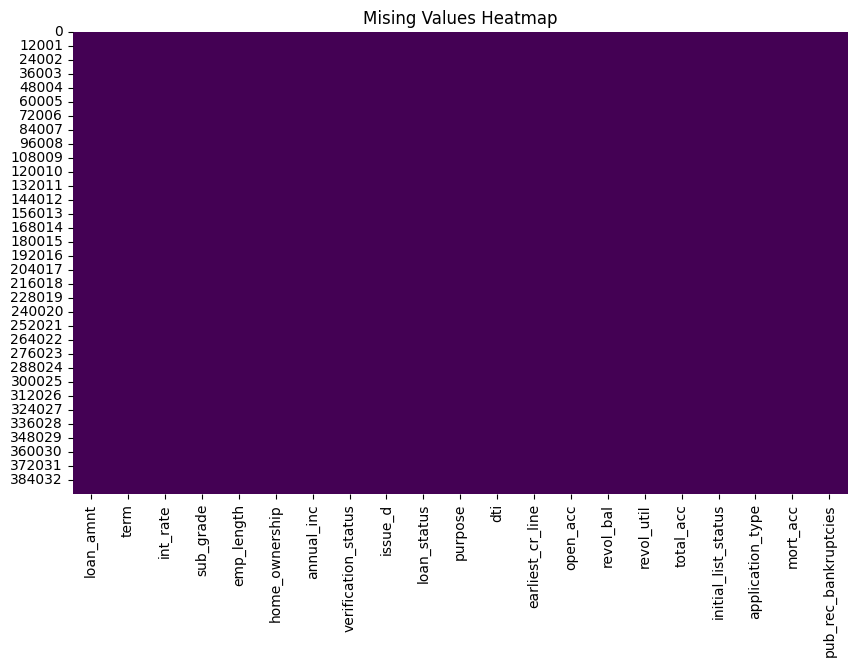

In [82]:
display(df.head())

# missing value check
print("\nMissing value")
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0]) 

plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Mising Values Heatmap')
plt.show()

## Transformasi Fitur `term`

Pada tahap ini, dilakukan pembersihan dan transformasi pada fitur **`term`** yang semula berbentuk teks (misalnya *"36 months"* dan *"60 months"*) menjadi tipe numerik.

### Tujuan Transformasi
- Mengubah tipe data menjadi numerik agar dapat diproses oleh algoritma Machine Learning.
- Menyederhanakan representasi data dengan hanya mengambil informasi durasi pinjaman dalam satuan bulan.
- Meningkatkan kompatibilitas model, terutama untuk model berbasis statistik dan jarak.

### Metode yang Digunakan
- Mengambil angka pertama dari string `term` (36 atau 60).
- Mengonversinya ke dalam tipe **integer**.
- Melakukan pengecekan ulang untuk memastikan hasil transformasi sudah benar.

### Hasil
Setelah transformasi:
- Kolom `term` hanya berisi nilai numerik **36** dan **60**.
- Distribusi jumlah pinjaman berdasarkan durasi dapat dianalisis dengan lebih mudah.
- Fitur siap digunakan dalam tahap modeling tanpa preprocessing tambahan.


In [83]:
# Melihat daftar kategori unik apa saja yang ada
print("Kategori unik di term:")
print(df['term'].unique())

# Melihat jumlah kemunculan tiap kategori (Lebih disarankan)
print("\nDistribusi tiap kategori:")
print(df['term'].value_counts())

Kategori unik di term:
<StringArray>
[' 36 months', ' 60 months']
Length: 2, dtype: str

Distribusi tiap kategori:
term
36 months    302005
60 months     94025
Name: count, dtype: int64


In [84]:
df['term'] = df['term'].apply(lambda x: int(x.split()[0]))

print("Kategori unik sekarang:", df['term'].unique())
print(df['term'].value_counts())

Kategori unik sekarang: [36 60]
term
36    302005
60     94025
Name: count, dtype: int64


## Encoding Fitur `initial_list_status`

Pada tahap ini, dilakukan proses **encoding** pada fitur kategorikal **`initial_list_status`** agar dapat digunakan dalam model Machine Learning.

### Penjelasan Fitur
- `f` (*fractional*) → menunjukkan pinjaman yang hanya tersedia sebagian.
- `w` (*whole*) → menunjukkan pinjaman yang tersedia sepenuhnya.

### Metode Encoding
- Menggunakan **binary mapping**:
  - `f` dipetakan menjadi **0**
  - `w` dipetakan menjadi **1**
- Pendekatan ini sederhana, efisien, dan sesuai karena fitur hanya memiliki dua kategori.

### Hasil
Setelah encoding:
- Kolom `initial_list_status` bertipe numerik.
- Distribusi masing-masing kategori dapat dianalisis melalui `value_counts()`.
- Fitur siap digunakan pada tahap pemodelan tanpa preprocessing tambahan.


In [85]:
# Mapping: f jadi 0, w jadi 1
df['initial_list_status'] = df['initial_list_status'].map({'f': 0, 'w': 1})

print(df['initial_list_status'].value_counts())

initial_list_status
0    238066
1    157964
Name: count, dtype: int64


In [86]:
# Melihat daftar kategori unik apa saja yang ada
print("Kategori unik di initial_list_status:")
print(df['initial_list_status'].unique())

Kategori unik di initial_list_status:
[1 0]


## Encoding Kolom `application_type`

Kolom `application_type` merupakan fitur kategorikal **nominal** dengan jumlah kategori yang sangat terbatas, yaitu *Individual*, *Joint*, *Direct Pay* . Oleh karena itu, teknik **one-hot encoding** dipilih untuk mengubah fitur ini ke dalam bentuk numerik agar dapat diproses oleh model machine learning.

Untuk menghindari **dummy variable trap** (multikolinearitas), proses encoding dilakukan dengan parameter `drop_first=True`, sehingga hanya satu kolom dummy yang dihasilkan dan satu kategori dijadikan sebagai *baseline*.

Pendekatan ini aman digunakan meskipun dataset memiliki lebih dari **390.000 baris**, karena one-hot encoding menambah jumlah **kolom**, bukan jumlah baris, sehingga tidak menimbulkan masalah dimensionalitas.


In [87]:
# Melihat daftar kategori unik apa saja yang ada
print("Kategori unik di application_type:")
print(df['application_type'].unique())

# Melihat jumlah kemunculan tiap kategori (Lebih disarankan)
print("\nDistribusi tiap kategori:")
print(df['application_type'].value_counts())

Kategori unik di application_type:
<StringArray>
['INDIVIDUAL', 'JOINT', 'DIRECT_PAY']
Length: 3, dtype: str

Distribusi tiap kategori:
application_type
INDIVIDUAL    395319
JOINT            425
DIRECT_PAY       286
Name: count, dtype: int64


In [88]:
# Membuat kolom dummies
app_type_dummies = pd.get_dummies(df['application_type'], drop_first=True)

# Gabungkan ke dataframe utama dan hapus kolom aslinya
df = pd.concat([df.drop('application_type', axis=1), app_type_dummies], axis=1)

print("Kolom baru yang terbentuk:")
print(app_type_dummies.columns)

Kolom baru yang terbentuk:
Index(['INDIVIDUAL', 'JOINT'], dtype='str')


## Pembuatan Target Variable `loan_repaid`

Pada tahap ini dilakukan pembentukan **target variable** bernama `loan_repaid` yang berasal dari kolom `loan_status`. Proses ini bertujuan untuk mengubah label kategorikal menjadi representasi numerik agar dapat digunakan dalam proses pemodelan machine learning.

Kolom `loan_status` memiliki dua kondisi utama yang relevan:
- **Fully Paid** → pinjaman berhasil dilunasi
- **Charged Off** → pinjaman gagal dibayar

Dalam pemetaan ini, nilai **Charged Off** diberi label **1**, sedangkan **Fully Paid** diberi label **0**. Pemilihan ini dilakukan karena fokus analisis adalah **mendeteksi risiko gagal bayar**, sehingga kondisi gagal bayar dijadikan sebagai *positive class*.


In [89]:
# Melihat daftar kategori unik apa saja yang ada
print("Kategori unik di loan_status:")
print(df['loan_status'].unique())

# Melihat jumlah kemunculan tiap kategori (Lebih disarankan)
print("\nDistribusi tiap kategori:")
print(df['loan_status'].value_counts())

Kategori unik di loan_status:
<StringArray>
['Fully Paid', 'Charged Off']
Length: 2, dtype: str

Distribusi tiap kategori:
loan_status
Fully Paid     318357
Charged Off     77673
Name: count, dtype: int64


In [90]:
df['loan_repaid'] = df['loan_status'].map({'Fully Paid': 0, 'Charged Off': 1})

print(df['loan_repaid'].value_counts())

loan_repaid
0    318357
1     77673
Name: count, dtype: int64


## Encoding Variabel `sub_grade`

Variabel `sub_grade` merupakan fitur kategorikal **ordinal** yang merepresentasikan tingkat risiko kredit peminjam secara lebih rinci. Setiap nilai `sub_grade` berada dalam satu urutan hierarkis, di mana risiko meningkat secara bertahap, misalnya dari **A1** (risiko paling rendah) hingga **G5** (risiko paling tinggi).

Karena adanya **urutan alami** pada variabel ini, teknik **ordinal encoding** digunakan untuk mengubah nilai kategorikal menjadi representasi numerik. Pendekatan ini memungkinkan model untuk menangkap hubungan tingkat risiko antar kategori secara lebih realistis dibandingkan one-hot encoding.

Dengan ordinal encoding, nilai numerik yang lebih besar merepresentasikan tingkat risiko yang lebih tinggi. Hal ini sejalan dengan konteks analisis kredit, di mana peminjam dengan `sub_grade` lebih tinggi memiliki probabilitas gagal bayar yang lebih besar.

Penggunaan ordinal encoding pada variabel `sub_grade` membantu model memahami struktur risiko kredit secara bertingkat tanpa menambah dimensi fitur secara berlebihan, sehingga meningkatkan efisiensi dan interpretabilitas model.

In [91]:
# Melihat daftar kategori unik apa saja yang ada
print("Kategori unik di sub_grade:")
print(df['sub_grade'].unique())

Kategori unik di sub_grade:
<StringArray>
['B4', 'B5', 'B3', 'A2', 'C5', 'C3', 'A1', 'B2', 'C1', 'A5', 'E4', 'A4', 'A3',
 'D1', 'C2', 'B1', 'D3', 'D5', 'D2', 'E1', 'E2', 'E5', 'F4', 'E3', 'D4', 'G1',
 'F5', 'G2', 'C4', 'F1', 'F3', 'G5', 'G4', 'F2', 'G3']
Length: 35, dtype: str


In [92]:
# Mapping manual A1=1 sampai G5=35
sub_grade_manual = {
    'A1': 1, 'A2': 2, 'A3': 3, 'A4': 4, 'A5': 5,
    'B1': 6, 'B2': 7, 'B3': 8, 'B4': 9, 'B5': 10,
    'C1': 11, 'C2': 12, 'C3': 13, 'C4': 14, 'C5': 15,
    'D1': 16, 'D2': 17, 'D3': 18, 'D4': 19, 'D5': 20,
    'E1': 21, 'E2': 22, 'E3': 23, 'E4': 24, 'E5': 25,
    'F1': 26, 'F2': 27, 'F3': 28, 'F4': 29, 'F5': 30,
    'G1': 31, 'G2': 32, 'G3': 33, 'G4': 34, 'G5': 35
}

# Terapkan ke kolom sub_grade
df['sub_grade'] = df['sub_grade'].map(sub_grade_manual)

print("Jumlah data yang gagal mapping:", df['sub_grade'].isnull().sum())
print("Contoh hasil 5 baris pertama:\n", df['sub_grade'].head())

Jumlah data yang gagal mapping: 0
Contoh hasil 5 baris pertama:
 0     9
1    10
2     8
3     2
4    15
Name: sub_grade, dtype: int64


## Encoding Variabel `home_ownership`

Variabel `home_ownership` merupakan fitur kategorikal **nominal** yang merepresentasikan status kepemilikan tempat tinggal peminjam. Pada tahap awal analisis, ditemukan beberapa kategori dengan frekuensi yang sangat rendah, yaitu *NONE* dan *ANY*.

Kategori dengan jumlah observasi yang kecil berpotensi menimbulkan **noise** serta meningkatkan sparsity pada data. Oleh karena itu, kategori *NONE* dan *ANY* digabungkan ke dalam satu kategori baru, yaitu *OTHER*, agar distribusi data menjadi lebih stabil dan representatif.

Setelah proses penggabungan kategori minor, variabel `home_ownership` diubah ke dalam bentuk numerik menggunakan **one-hot encoding**, karena variabel ini tidak memiliki urutan hierarkis. Untuk menghindari **dummy variable trap** atau multikolinearitas, satu kategori dijadikan sebagai *baseline*.

Melalui pendekatan ini, informasi terkait kepemilikan tempat tinggal tetap terjaga tanpa menambah kompleksitas fitur secara berlebihan, sehingga dataset menjadi lebih siap dan stabil untuk digunakan dalam proses pemodelan machine learning.


In [93]:
# Melihat daftar kategori unik apa saja yang ada
print("Kategori unik di home_ownership:")
print(df['home_ownership'].unique())

# Melihat jumlah kemunculan tiap kategori (Lebih disarankan)
print("\nDistribusi tiap kategori:")
print(df['home_ownership'].value_counts())

Kategori unik di home_ownership:
<StringArray>
['RENT', 'MORTGAGE', 'OWN', 'OTHER', 'NONE', 'ANY']
Length: 6, dtype: str

Distribusi tiap kategori:
home_ownership
MORTGAGE    198348
RENT        159790
OWN          37746
OTHER          112
NONE            31
ANY              3
Name: count, dtype: int64


In [94]:
df['home_ownership'] = df['home_ownership'].replace(['NONE', 'ANY'], 'OTHER')

print("Distribusi setelah digabung:")
print(df['home_ownership'].value_counts())

home_dummies = pd.get_dummies(df['home_ownership'], drop_first=True)

df = pd.concat([df.drop('home_ownership', axis=1), home_dummies], axis=1)

print("\nKolom baru yang terbentuk:")
print(home_dummies.columns)

Distribusi setelah digabung:
home_ownership
MORTGAGE    198348
RENT        159790
OWN          37746
OTHER          146
Name: count, dtype: int64

Kolom baru yang terbentuk:
Index(['OTHER', 'OWN', 'RENT'], dtype='str')


In [95]:
# Melihat daftar kategori unik apa saja yang ada
print("Kategori unik di verification_status:")
print(df['verification_status'].unique())

# Melihat jumlah kemunculan tiap kategori (Lebih disarankan)
print("\nDistribusi tiap kategori:")
print(df['verification_status'].value_counts())

Kategori unik di verification_status:
<StringArray>
['Not Verified', 'Source Verified', 'Verified']
Length: 3, dtype: str

Distribusi tiap kategori:
verification_status
Verified           139563
Source Verified    131385
Not Verified       125082
Name: count, dtype: int64


In [96]:
print("Kategori unik di purpose:")
print(df['purpose'].unique())
print("\nDistribusi tiap kategori:")
print(df['purpose'].value_counts())

Kategori unik di purpose:
<StringArray>
[          'vacation', 'debt_consolidation',        'credit_card',
   'home_improvement',     'small_business',     'major_purchase',
              'other',            'medical',            'wedding',
                'car',             'moving',              'house',
        'educational',   'renewable_energy']
Length: 14, dtype: str

Distribusi tiap kategori:
purpose
debt_consolidation    234507
credit_card            83019
home_improvement       24030
other                  21185
major_purchase          8790
small_business          5701
car                     4697
medical                 4196
moving                  2854
vacation                2452
house                   2201
wedding                 1812
renewable_energy         329
educational              257
Name: count, dtype: int64


In [97]:
print("Kolom yang masih berupa teks:")
print(df.select_dtypes(include=['object']).columns)

Kolom yang masih berupa teks:
Index(['verification_status', 'issue_d', 'loan_status', 'purpose',
       'earliest_cr_line'],
      dtype='str')


C:\Users\user\AppData\Local\Temp\ipykernel_24380\1369853181.py:2: Pandas4Warning: For backward compatibility, 'str' dtypes are included by select_dtypes when 'object' dtype is specified. This behavior is deprecated and will be removed in a future version. Explicitly pass 'str' to `include` to select them, or to `exclude` to remove them and silence this warning.
See https://pandas.pydata.org/docs/user_guide/migration-3-strings.html#string-migration-select-dtypes for details on how to write code that works with pandas 2 and 3.
  print(df.select_dtypes(include=['object']).columns)
